1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


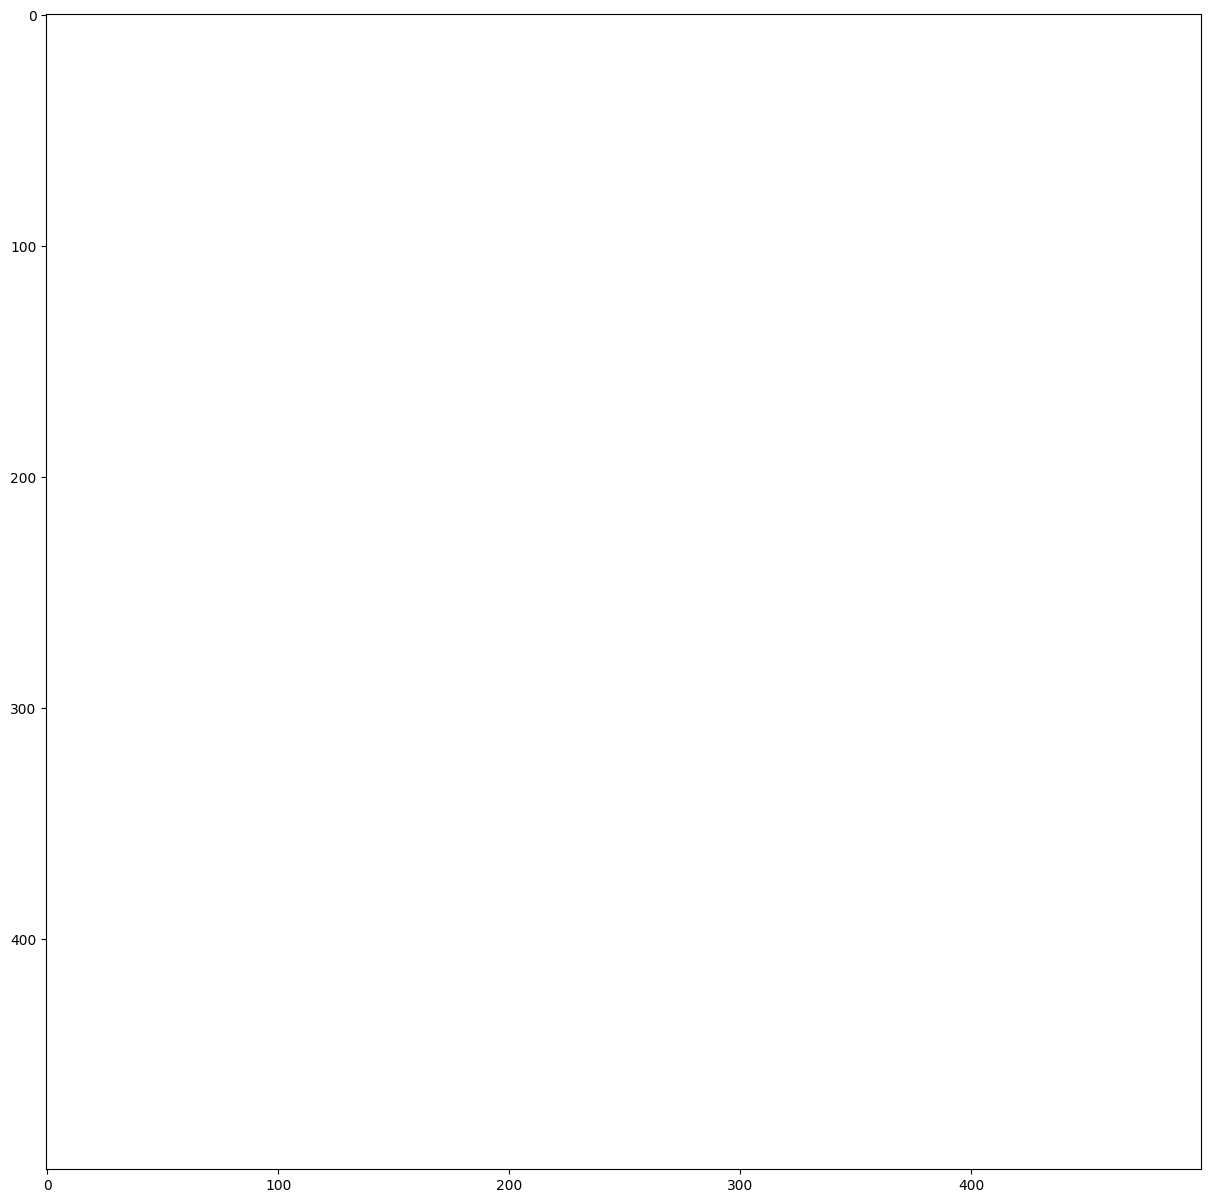

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import math

def Julia(Z,a,limit): #function that calculates the Julia Set
    
    t = 0 #counter variable
    magnitude = 0 #variable that is there to tell us when we've stepped outside of the circle
    
    while(magnitude < 4 and t < limit): #as long as we're inside the circle and under the limit, continue iterating
        Z = (Z**2)+(0.7885*math.e**(a*1J)) #Z^2+0.7885*e^(a*i)
        magnitude = ( (Z.real)**2+(Z.imag)**2 )**(1/2) #checking magnitude of function
        t = t + 1 #keeps track of how many iterations
    
    return t #return number of iterations to reach either outside of circle, or the limit variable

limit = 80 #limit for Julia function
fig = plt.figure(figsize=(15,15)) #sets the size of the figure
Round = np.linspace(0,(2*math.pi),100) #array of values from [0,2pi]
ims = [] #empty list that stores the image from each iteration

Snapshot = 1 #counter that tells the user where in the process the program is
for _ in Round: #this iterates for every element in the Round list we made above
    
    print(Snapshot) #prints user what step the program is
    
    x = np.linspace(-2,2,500) #makes x and y lists with 500 elements each
    y = np.linspace(-2,2,500) #equal distance between each element between -2 and 2
    matrix = [[0 for i in range(len(x))] for j in range(len(y))] #makes a 0 matrix, 500x500

    i = 0
    while i<len(x): #iterates per i element
        j = 0
        while j<len(y): #iterates per j element
            Z = complex(x[i],y[j]) #creates complex number
            matrix[j][i] = Julia(Z,Round[Snapshot-1],limit) #calls Julia function and assigns the result to matrix element
            j = j + 1
        i = i + 1

    im = plt.imshow(matrix, cmap = 'twilight_shifted', animated=True) #stores image to im
    ims.append([im]) #adds image to list of images
    Snapshot = Snapshot + 1 #iterates counter for user

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=False, repeat_delay=1000) #creates animation from the images list
ani.save('animation.gif', writer='pillow', fps=15) #saves animation as a gif